In [1]:
import numpy as np
import random

In [2]:
def P(x):
    return (x[0] * x[1]) - 4

def Q(x):
    return (x[0] - 4) * (x[1] - x[0])


In [3]:
def wVxk(vxk, vyk):
    return vxk / np.sqrt(vxk ** 2 + vyk ** 2)

def wVyk(vxk, vyk):
    return vyk / np.sqrt(vxk ** 2 + vyk ** 2)

def Vxk(x_1):
    return P(x_1)

def Vyk(x_1):
    return Q(x_1)

def wVk(wvxk, wvyk):
    return np.array([wvxk, wvyk])

In [4]:
def build(init_point: tuple, alpha_x: float, alpha_y: float, N: int):
    alpha = np.array([alpha_x, alpha_y])
    sequence = [np.array(init_point)]
    
    for i in range(N):
        p = sequence[-1]
        vxk, vyk = Vxk(p), Vyk(p)
        wvxk, wvyk = wVxk(vxk, vyk), wVyk(vxk, vyk) 
        
        sequence.append(p + alpha * wVk(wvxk, wvyk))
    
    sequence = np.array(sequence).T
    return sequence[0], sequence[1]

In [5]:
def build_exp(init_point: tuple, N: int):
    sequence = [np.array(init_point)]
    
    for i in range(N):
        p = sequence[-1]
        alpha = random.expovariate(150)
        vxk, vyk = Vxk(p), Vyk(p)
        wvxk, wvyk = wVxk(vxk, vyk), wVyk(vxk, vyk) 
        
        sequence.append(p + alpha * wVk(wvxk, wvyk))
    
    sequence = np.array(sequence).T
    return sequence[0], sequence[1]

In [6]:
def build_norm(init_point: tuple, N: int):
    sequence = [np.array(init_point)]
    
    for i in range(N):
        p = sequence[-1]
        alpha = random.normalvariate(0.01, 0.001)
        vxk, vyk = Vxk(p), Vyk(p)
        wvxk, wvyk = wVxk(vxk, vyk), wVyk(vxk, vyk) 
        
        sequence.append(p + alpha * wVk(wvxk, wvyk))
    
    sequence = np.array(sequence).T
    return sequence[0], sequence[1]

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

## Сталі параметри кроку

/home/sirko/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/sirko/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


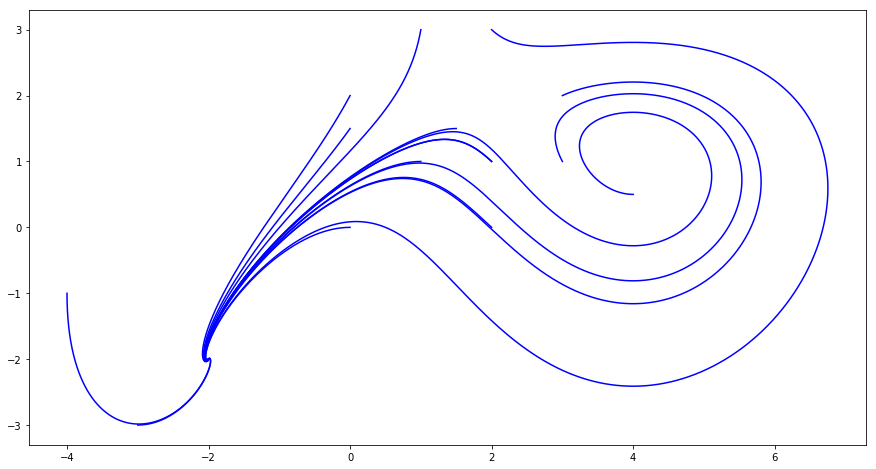

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

dots = [(2, 2), (-2, -2), (4, 1), (0, 0), (1, 1), (3, 1), (-4, -1), (-3, -3), (2, 1), (0, 2), (0, 1.5), (4, 0.5), 
       (2, 0), (2, 1), (3, 2), (1.5, 1.5), (2, 3), (1, 3)]

for dot in dots:
    x, y = build(init_point=dot, alpha_x=1e-3, alpha_y=1e-3, N=100000)
    ax.plot(x, y, c="b")

## Зменшені параметри кроку

/home/sirko/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/sirko/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


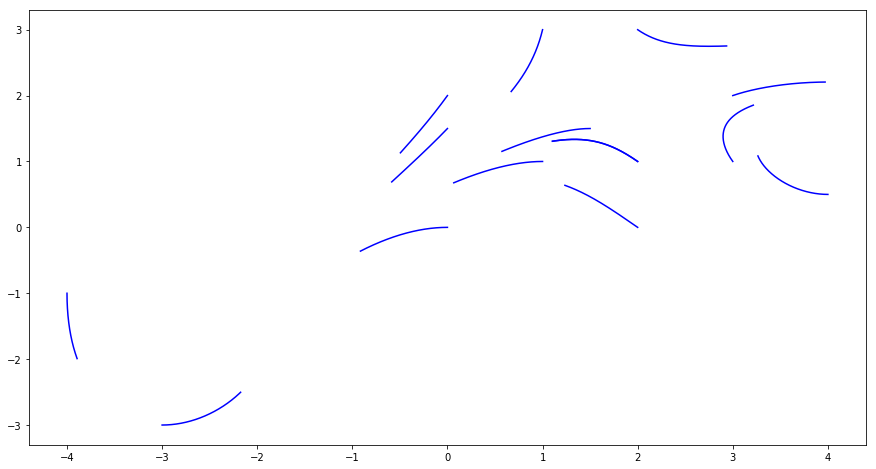

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

dots = [(2, 2), (-2, -2), (4, 1), (0, 0), (1, 1), (3, 1), (-4, -1), (-3, -3), (2, 1), (0, 2), (0, 1.5), (4, 0.5), 
       (2, 0), (2, 1), (3, 2), (1.5, 1.5), (2, 3), (1, 3)]

for dot in dots:
    x, y = build(init_point=dot, alpha_x=1e-5, alpha_y=1e-5, N=100000)
    ax.plot(x, y, c="b")

## Експоненційний розподіл

/home/sirko/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/sirko/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


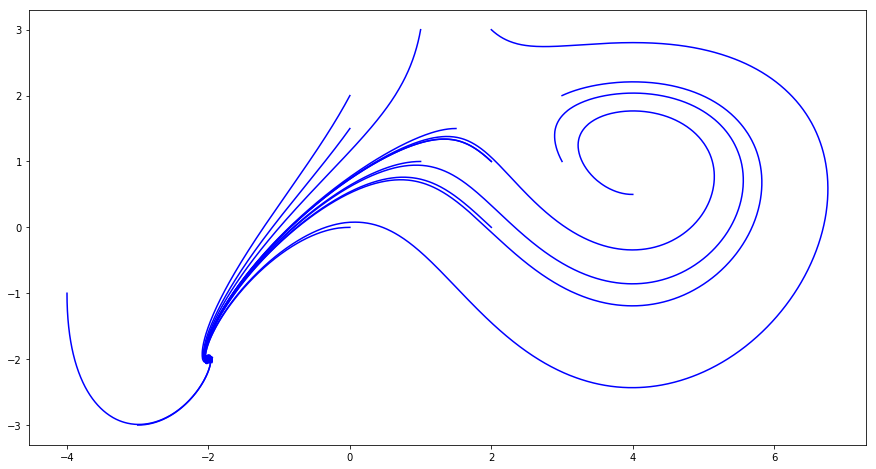

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

dots = [(2, 2), (-2, -2), (4, 1), (0, 0), (1, 1), (3, 1), (-4, -1), (-3, -3), (2, 1), (0, 2), (0, 1.5), (4, 0.5), 
       (2, 0), (2, 1), (3, 2), (1.5, 1.5), (2, 3), (1, 3)]

for dot in dots:
    x, y = build_exp(init_point=dot, N=10000)
    ax.plot(x, y, c="b")

## Нормальний розподіл

/home/sirko/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/home/sirko/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


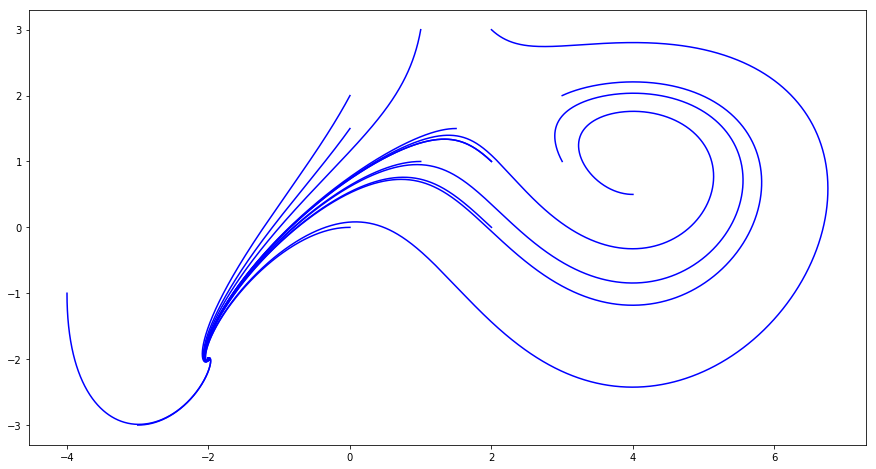

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

dots = [(2, 2), (-2, -2), (4, 1), (0, 0), (1, 1), (3, 1), (-4, -1), (-3, -3), (2, 1), (0, 2), (0, 1.5), (4, 0.5), 
       (2, 0), (2, 1), (3, 2), (1.5, 1.5), (2, 3), (1, 3)]

for dot in dots:
    x, y = build_norm(init_point=dot, N=10000)
    ax.plot(x, y, c="b")